In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

## Full dataset

In [2]:
dataset_athaliana = get_transmembrane_transporter_dataset(  # athaliana
    organism_ids=[3702],
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_athaliana)

cd-hit: clustered 1773 sequences into 646 clusters at threshold 50
cd-hit: clustered 1773 sequences into 923 clusters at threshold 70
cd-hit: clustered 1773 sequences into 1203 clusters at threshold 90
cd-hit: clustered 1773 sequences into 1554 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              100                      3   
                                                                          None                     3   
                                               transcript_level           50                       3   
                                                                          70                       4   
                                                                          90                       7   
                                                                          100                     37   
                                                                          None                    49   
                   True          computational protein_level              50                      87   
                                                                          70                     114   
                                                                          90                     153   
                                                                          100                    329   
                                                                          None                   433   
                                               transcript_level           50                       7   
                                                                          70                      13   
                                                                          90                      19   
                                                                          100                     84   
                                                                          None                   164   
                                 experiment    protein_level              50                      25   
                                                                          70                      33   
                                                                          90                      38   
                                                                          100                     41   
                                                                          None                    42   
                                               transcript_level           50                       3   
                                                                          70                       5   
                                                                          90                       5   
                                                                          100                      6   
                                                                          None                     6   
True               True          computational protein_level              50                     206   
                                                                          70                     287   
                                                                          90                     370   
                                                                          100                    408   
                                                                          None                   418   
                                               transcript_level           50                     208   
                                                                          70                     338   
                                                                          90                     462   
                                                                          100                    492   
                                                                          None                   504   
                              

## Filtered Subset

In [3]:
dataset_athaliana = get_transmembrane_transporter_dataset(  # athaliana
    organism_ids=[3702],
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_athaliana)

cd-hit: clustered 420 sequences into 276 clusters at threshold 50
cd-hit: clustered 420 sequences into 344 clusters at threshold 70
cd-hit: clustered 420 sequences into 403 clusters at threshold 90
cd-hit: clustered 420 sequences into 419 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     276   
                                                                        70                     344   
                                                                        90                     403   
                                                                        100                    419   
                                                                        None                   420   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              264  
                                                                        70              281  
                                                                        90              288  
                                                                        100             288  
                                                                        None            288

## Sugar/Amino subset

In [4]:
from subpred.dataset_filters import get_classification_subset
dataset_athaliana = get_classification_subset(dataset_full=dataset_athaliana, go_terms=[
                "sugar transmembrane transporter activity",
                "amino acid transmembrane transporter activity",
            ])

print("before clustering:")
dataset_athaliana[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

In [5]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_athaliana = filter_no_3Di_available(dataset_athaliana)
dataset_athaliana[1].go_term_ancestor.value_counts()

go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

Clustering at 70%

In [6]:
from subpred.dataset_filters import cluster_sequences
dataset_athaliana = cluster_sequences(dataset_full=dataset_athaliana, identity_threshold=70)
dataset_athaliana[1].go_term_ancestor.value_counts()

cd-hit: clustered 65 sequences into 54 clusters at threshold 70


go_term_ancestor
sugar transmembrane transporter activity         28
amino acid transmembrane transporter activity    26
Name: count, dtype: int64

## Feature generation

In [ ]:
from subpred.features import get_features
features_list, series_labels = get_features(dataset_full=dataset_athaliana)

2025-05-26 02:16:17.424775: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-26 02:16:17.431306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748218577.437831  287578 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748218577.440070  287578 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-26 02:16:17.447944: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

For each Feature: Outlier detection, numpy conversion 

In [8]:
from subpred.features import get_ml_datasets
ml_datasets = get_ml_datasets(features_list=features_list, series_labels=series_labels)
ml_datasets

[('DUMMY',
  array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.6204999 , 0.63962224,
          0.9485403 ],
         [0.77827617, 0.84834527, 0.49041991, ..., 0.94382759, 0.68678337,
          0.28757538],
         [0.76899892, 0.08316477, 0.97477442, ..., 0.40850912, 0.08875799,
          0.55057892],
         ...,
         [0.40881623, 0.21808137, 0.11551726, ..., 0.15923602, 0.43994865,
          0.88294092],
         [0.90266826, 0.61492543, 0.95925377, ..., 0.59331212, 0.60354607,
          0.33733361],
         [0.61343313, 0.85712651, 0.56022607, ..., 0.17547851, 0.84452518,
          0.48344004]], shape=(54, 1024)),
  array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
         1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 1, 0]),
  array(['Q84WN3', 'Q8GUM3', 'Q8L9J7', 'Q8VZ80', 'Q9FMF7', 'Q9SMM5',
         'Q94KE0', 'Q9C8E7', 'Q9FG00', 'Q9FKS8', 'Q9FY94', 'O81845',
         'Q8GX78', 'Q8LFH5', 'Q9CA93',

In [ ]:
# saving as pickle, to load in different notebook with different env, 
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle
with open("../data/tmp_data/ml_data_at_sugaramino.pickle", 'wb') as handle:
    pickle.dump(ml_datasets, handle)

# with open("../data/tmp/ml_data_at_sugaramino.pickle", "rb") as handle:
#     ml_datasets_from_pickle = pickle.load(handle)

## Outliers

In [10]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_athaliana,ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor


## Model evaluation SVM

,median_val,std_val
Feature Name,,
DUMMY,0.500000,0.134325
AAC,0.716667,0.146060
PSSM_50_1,0.750000,0.100800
PSSM_90_1,0.816667,0.130014
PSSM_90_3,0.816667,0.130014
META,0.816667,0.126044
PSSM_META,0.816667,0.125176
PSSM_50_3,0.833333,0.119493
META_STD,0.900000,0.104771


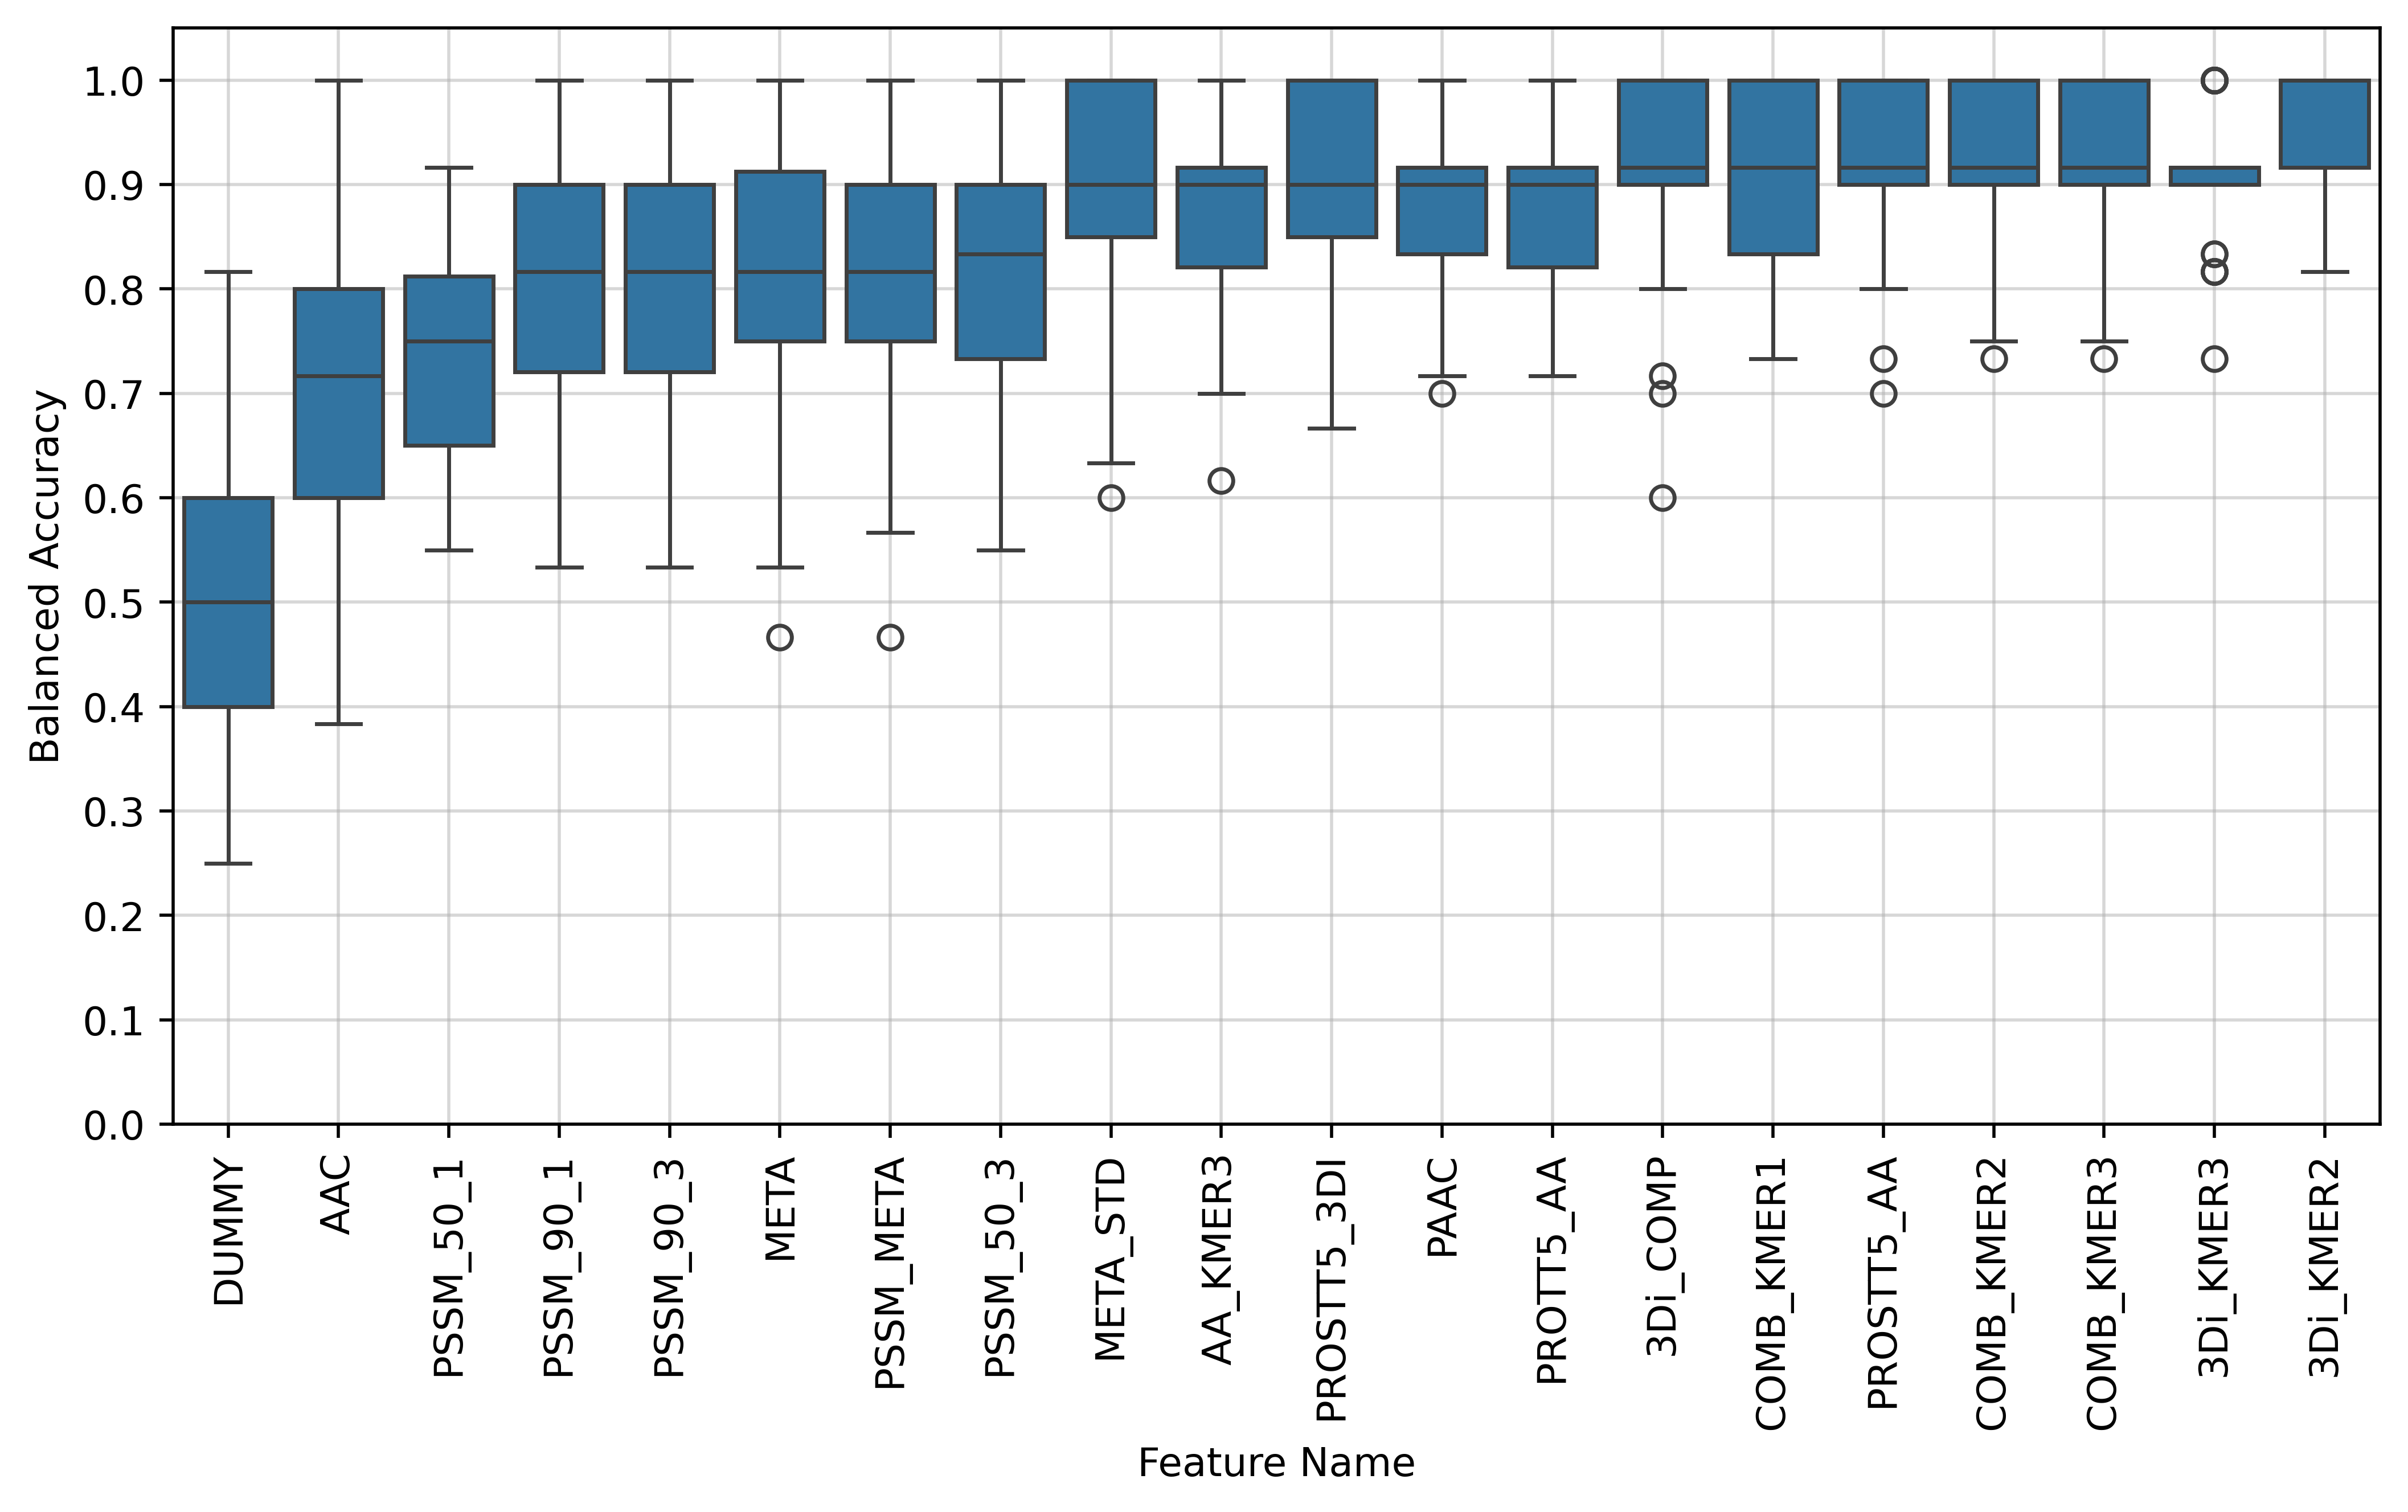

In [ ]:
from subpred.evaluation import get_svm_results, plot_results_long

RESULTS_FOLDER = "../data/results/"
TEST_NAME = "svc_athaliana_sugar_amino"
RECALCULATE = True


df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
)
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
)

In [12]:
# TODO linear svm, linear svm with nyström, DNN -> other?
# TODO maybe find all sugar transporters against background of all proteins?